In [99]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Datasets/COVID-19_Vaccination_Demographics_in_the_United_States_National.csv")
df['Demographic_category'].unique()

array(['Ages_50-64_yrs', 'Ages_<12yrs', 'Ages_25-49_yrs', 'US',
       'Race_eth_unknown', 'Race_eth_NHWhite', 'Ages_<5yrs',
       'Race_eth_known', 'Race_eth_NHNHOPI', 'Sex_unknown', 'Age_known',
       'Ages_12-15_yrs', 'Race_eth_NHMultiracial', 'Ages_2-4_yrs',
       'Ages_<2yrs', 'Ages_16-17_yrs', 'Sex_Male', 'Ages_65+_yrs',
       'Race_eth_NHBlack', 'Sex_Female', 'Race_eth_NHMult_Oth',
       'Ages_18-24_yrs', 'Ages_65-74_yrs', 'Ages_40-49_yrs',
       'Ages_25-39_yrs', 'Sex_known', 'Race_eth_NHOther',
       'Ages_12-17_yrs', 'Race_eth_NHAIAN', 'Age_unknown',
       'Race_eth_Hispanic', 'Race_eth_NHAsian', 'Ages_75+_yrs',
       'Ages_5-11_yrs'], dtype=object)

In [100]:
df1 = df[~df.Demographic_category.str.contains("Ages_50-64")] 
df1 = df1[~df1.Demographic_category.str.contains("Ages_65-74")] 
df1 = df1[~df1.Demographic_category.str.contains("Ages_75")] 
df1

,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,...,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes,Booster_Doses_Yes_Last14Days,Second_Booster_Vax_pct_agegroup,Second_Booster_Pop_Pct_known,Second_Booster_Pop_Pct_US,Second_Booster_Pop_Pct_known_Last14Days,Second_Booster,Second_Booster_Last14Days
1,09/14/2022,Ages_<12yrs,12370629,4.7,4.7,9388021,25.5,19.4,4.2,4.2,...,0.4,15.5,1299726.0,33382.0,NaN,NaN,NaN,NaN,NaN,NaN
2,09/14/2022,Ages_25-49_yrs,91180260,34.6,34.6,77086275,83.5,70.6,34.3,34.3,...,35.7,25.4,31756498.0,54497.0,NaN,NaN,NaN,NaN,NaN,NaN
3,09/14/2022,US,263415633,NaN,100.0,224636858,79.3,67.7,NaN,100.0,...,100.0,NaN,109078517.0,214966.0,34.7,NaN,100.0,NaN,22495442.0,294476.0
4,09/14/2022,Race_eth_unknown,66248245,33.6,25.1,48825783,NaN,NaN,27.8,21.7,...,27.8,12.5,12357022.0,23873.0,31.6,11.5,10.3,8.5,2321551.0,23025.0
5,09/14/2022,Race_eth_NHWhite,108216327,54.9,41.1,98448739,54.8,49.9,56.0,43.8,...,56.0,59.5,58720121.0,113775.0,37.2,70.6,63.3,70.7,14235853.0,191902.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21789,12/13/2020,Race_eth_known,23654,99.9,76.8,6027,NaN,NaN,99.9,76.0,...,99.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21790,12/13/2020,Sex_unknown,263,0.9,0.9,88,NaN,NaN,1.1,1.1,...,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21791,12/13/2020,Age_unknown,6,0.0,0.0,0,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21792,12/13/2020,Ages_25-49_yrs,10196,33.1,33.1,2603,0.0,0.0,32.8,32.8,...,32.9,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
df2 = pd.merge(df, df1, how='outer', indicator=True)
df2 = df2[~df2._merge.str.contains("both")] 
df2 = df2.drop(['_merge'], axis=1)
df2

,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,...,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes,Booster_Doses_Yes_Last14Days,Second_Booster_Vax_pct_agegroup,Second_Booster_Pop_Pct_known,Second_Booster_Pop_Pct_US,Second_Booster_Pop_Pct_known_Last14Days,Second_Booster,Second_Booster_Last14Days
0,09/14/2022,Ages_50-64_yrs,59916337,22.7,22.7,52440445,94.1,82.4,23.3,23.3,...,24.3,18.6,29125156.0,39993.0,25.8,33.5,33.5,43.5,7527586.0,128146.0
22,09/14/2022,Ages_65-74_yrs,34251327,13.0,13.0,30127305,95.0,94.5,13.4,13.4,...,13.9,17.7,20809992.0,38105.0,40.3,37.2,37.2,35.5,8377649.0,104645.0
32,09/14/2022,Ages_75+_yrs,23286361,8.8,8.8,20372118,95.0,88.9,9.1,9.1,...,9.4,11.6,14925920.0,24894.0,44.2,29.3,29.3,20.9,6590207.0,61685.0
37,09/13/2022,Ages_50-64_yrs,59916337,22.7,22.7,52440445,94.1,82.4,23.3,23.3,...,24.3,18.2,29125156.0,41944.0,25.8,33.5,33.5,43.4,7527586.0,132492.0
57,09/13/2022,Ages_65-74_yrs,34251327,13.0,13.0,30127305,95.0,94.5,13.4,13.4,...,13.9,16.9,20809992.0,39168.0,40.3,37.2,37.2,35.5,8377649.0,108415.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21739,12/14/2020,Ages_75+_yrs,3693,10.4,10.4,589,0.0,0.0,7.3,7.3,...,7.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21759,12/14/2020,Ages_50-64_yrs,10150,28.7,28.7,2656,0.0,0.0,32.9,32.9,...,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21760,12/13/2020,Ages_50-64_yrs,8790,28.5,28.5,2604,0.0,0.0,32.9,32.9,...,32.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21769,12/13/2020,Ages_75+_yrs,3597,11.7,11.7,585,0.0,0.0,7.4,7.4,...,7.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2[~(df2['Date'] < '2021-08-13')]
df2

,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,...,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes,Booster_Doses_Yes_Last14Days,Second_Booster_Vax_pct_agegroup,Second_Booster_Pop_Pct_known,Second_Booster_Pop_Pct_US,Second_Booster_Pop_Pct_known_Last14Days,Second_Booster,Second_Booster_Last14Days
0,2022-09-14,Ages_50-64_yrs,59916337,22.7,22.7,52440445,94.1,82.4,23.3,23.3,...,24.3,18.6,29125156.0,39993.0,25.8,33.5,33.5,43.5,7527586.0,128146.0
22,2022-09-14,Ages_65-74_yrs,34251327,13.0,13.0,30127305,95.0,94.5,13.4,13.4,...,13.9,17.7,20809992.0,38105.0,40.3,37.2,37.2,35.5,8377649.0,104645.0
32,2022-09-14,Ages_75+_yrs,23286361,8.8,8.8,20372118,95.0,88.9,9.1,9.1,...,9.4,11.6,14925920.0,24894.0,44.2,29.3,29.3,20.9,6590207.0,61685.0
37,2022-09-13,Ages_50-64_yrs,59916337,22.7,22.7,52440445,94.1,82.4,23.3,23.3,...,24.3,18.2,29125156.0,41944.0,25.8,33.5,33.5,43.4,7527586.0,132492.0
57,2022-09-13,Ages_65-74_yrs,34251327,13.0,13.0,30127305,95.0,94.5,13.4,13.4,...,13.9,16.9,20809992.0,39168.0,40.3,37.2,37.2,35.5,8377649.0,108415.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13479,2021-08-14,Ages_50-64_yrs,50096413,25.1,25.1,44797143,78.7,70.4,25.7,25.7,...,25.7,28.0,14483.0,14483.0,0.0,23.5,23.5,23.5,4.0,4.0
13497,2021-08-14,Ages_65-74_yrs,29474214,14.8,14.8,26999757,92.4,84.7,15.5,15.5,...,15.5,28.3,14659.0,14659.0,0.0,23.5,23.5,23.5,4.0,4.0
13498,2021-08-13,Ages_65-74_yrs,29459684,14.8,14.8,26988706,92.4,84.6,15.5,15.5,...,15.5,20.7,3025.0,3025.0,0.0,0.0,0.0,0.0,0.0,0.0
13501,2021-08-13,Ages_75+_yrs,20125609,10.1,10.1,18392868,87.9,80.3,10.6,10.6,...,10.6,11.8,1720.0,1720.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
df2['Percent_2xBoosted'] = (df2['Second_Booster'] / df2['Booster_Doses_Yes']) * 100

/var/folders/ty/4x_62d5519v8j9nmmkvjd6h00000gn/T/ipykernel_42386/4092754399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Percent_2xBoosted'] = (df2['Second_Booster'] / df2['Booster_Doses_Yes']) * 100


In [104]:
df2 = df2[['Date', 'Demographic_category', 'Percent_2xBoosted']]
df3 = df2
df2 = df2.pivot(index='Date', columns='Demographic_category', values='Percent_2xBoosted')
df2

Demographic_category,Ages_50-64_yrs,Ages_65-74_yrs,Ages_75+_yrs
Date,,,
2021-08-13,0.000000,0.000000,0.000000
2021-08-14,0.027619,0.027287,0.096349
2021-08-15,0.081183,0.090016,0.162065
2021-08-16,0.120291,0.131091,0.195763
2021-08-17,0.141895,0.172918,0.182418
...,...,...,...
2022-09-10,25.771471,40.181461,44.093391
2022-09-11,25.805203,40.208554,44.112454
2022-09-12,25.842610,40.254505,44.149932


<AxesSubplot:title={'center':'Percentage of Older Individuals who Receive Both Booster Shots After Receiving the First Booster'}, xlabel='Date', ylabel='Percent'>

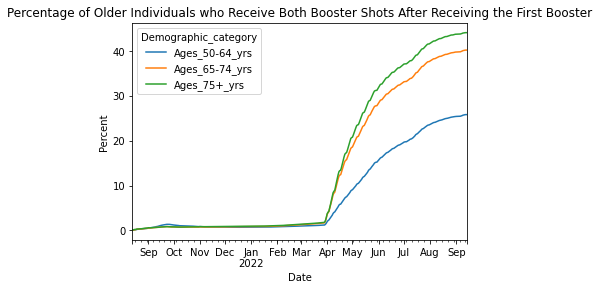

In [105]:
df2.plot(title='Percentage of Older Individuals who Receive Both Booster Shots After Receiving the First Booster', ylabel='Percent')

In [98]:
df2.to_csv('question_data1.csv', index=True)
df2

Demographic_category,Ages_50-64_yrs,Ages_75+_yrs
Date,,
2021-08-13,0.000000,0.000000
2021-08-14,0.027619,0.096349
2021-08-15,0.081183,0.162065
2021-08-16,0.120291,0.195763
2021-08-17,0.141895,0.182418
...,...,...
2022-09-10,25.771471,44.093391
2022-09-11,25.805203,44.112454
2022-09-12,25.842610,44.149932
